In [3]:
import pandas as pd
import numpy as np
df=pd.read_excel('yahoo_data.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1258 non-null   datetime64[ns]
 1   Open         1258 non-null   float64       
 2   High         1258 non-null   float64       
 3   Low          1258 non-null   float64       
 4   Close*       1258 non-null   float64       
 5   Adj Close**  1258 non-null   float64       
 6   Volume       1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [7]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1253    False
1254    False
1255    False
1256    False
1257    False
Length: 1258, dtype: bool

In [9]:
#Daily returns
df['daily_returns']=df['Adj Close**'].pct_change()

In [10]:
df.dropna()

,Date,Open,High,Low,Close*,Adj Close**,Volume,daily_returns
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,-0.007977
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,-0.015500
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,0.006875
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,0.010276
5,2023-04-21,33793.60,33858.83,33688.57,33808.96,33808.96,291080000,-0.001961
...,...,...,...,...,...,...,...,...
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,-0.000119
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,-0.003892
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,-0.013699
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,-0.000216


In [57]:
#Cumulative returns
df['cumulative_returns']=(1+df['daily_returns']).cumprod()

In [12]:
#Compound Annual growth rate
starting_price=df['Close*'].iloc[0]
ending_price=df['Close*'].iloc[-1]
years=(df['Date'].iloc[0]-df['Date'].iloc[-1]).days/365
CAGR=(starting_price-ending_price)**(1/years)-1
print(round(CAGR))

5


In [29]:
#Standard deviation & Daily mean value
daily_mean=df['daily_returns'].mean()
std_dev=df['daily_returns'].std()
print(round(std_dev,4))

0.0137


In [63]:
#Rolling volatiility
df['rolling_20']=(df['daily_returns'].dropna().rolling(window=20).std())

In [65]:
df.head(25)

,Date,Open,High,Low,Close*,Adj Close**,Volume,daily_returns,cumulative_returns,rolling_20,peak,dropdown
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,NaN,NaN,NaN,NaN,NaN
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,-0.007977,0.992023,NaN,0.992023,0.000000
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,-0.015500,0.976647,NaN,0.992023,-0.015500
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,0.006875,0.983362,NaN,0.992023,-0.008731
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,0.010276,0.993467,NaN,0.993467,0.000000
5,2023-04-21,33793.60,33858.83,33688.57,33808.96,33808.96,291080000,-0.001961,0.991519,NaN,0.993467,-0.001961
6,2023-04-20,33740.60,33875.39,33677.74,33786.62,33786.62,307910000,-0.000661,0.990863,NaN,0.993467,-0.002621
7,2023-04-19,33889.83,33957.98,33814.65,33897.01,33897.01,251490000,0.003267,0.994101,NaN,0.994101,0.000000
8,2023-04-18,33965.16,34018.62,33791.89,33976.63,33976.63,253570000,0.002349,0.996436,NaN,0.996436,0.000000
9,2023-04-17,33930.46,33991.23,33796.91,33987.18,33987.18,234530000,0.000311,0.996745,NaN,0.996745,0.000000


In [61]:
#Dropdown
df['peak']=df['cumulative_returns'].cummax()
df['dropdown']=(df['cumulative_returns']-df['peak'])/df['peak']
max_dropdown=df['dropdown'].min()
print(round(max_dropdown,3))

-0.495


In [77]:
#Sharpe ratio
shrape_daily=daily_mean/std_dev
shrape_annual = shrape_daily * np.sqrt(252)
print(round(shrape_daily,3))
print(round(shrape_annual,3))

-0.013
-0.213


In [85]:
# Short-term moving average (20 days)
df['MA_20'] = df['Close*'].rolling(window=20).mean()

# Long-term moving average (50 days)
df['MA_50'] = df['Close*'].rolling(window=50).mean()

df['trend'] = np.where(df['MA_20'] > df['MA_50'], 'Uptrend', 'Downtrend')

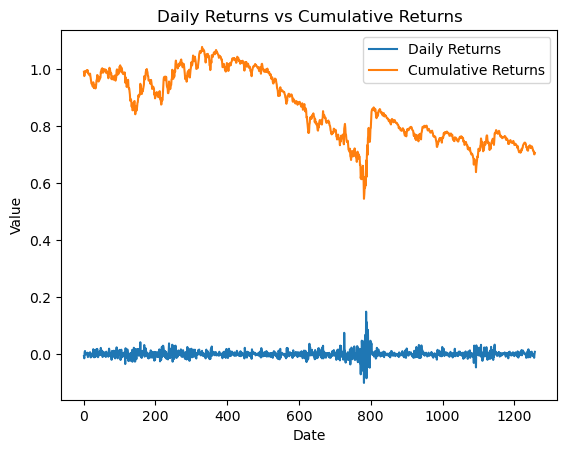

In [91]:
#Daily Returns vs Cumulative Returns
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df.index, df['daily_returns'], label='Daily Returns')
plt.plot(df.index, df['cumulative_returns'], label='Cumulative Returns')
plt.legend()
plt.title('Daily Returns vs Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


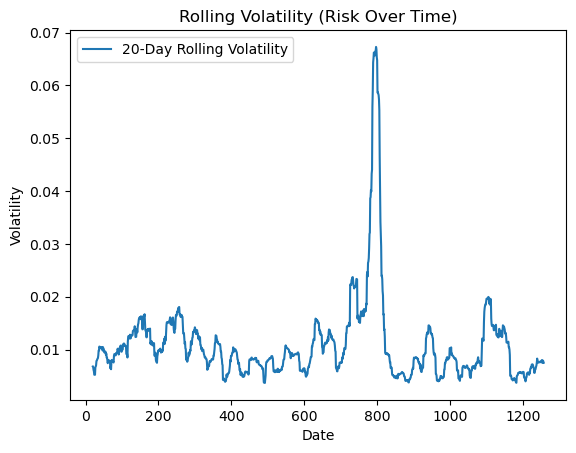

In [93]:
#Rolling Volatility (20-day)
plt.figure()
plt.plot(df.index, df['rolling_20'], label='20-Day Rolling Volatility')
plt.legend()
plt.title('Rolling Volatility (Risk Over Time)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


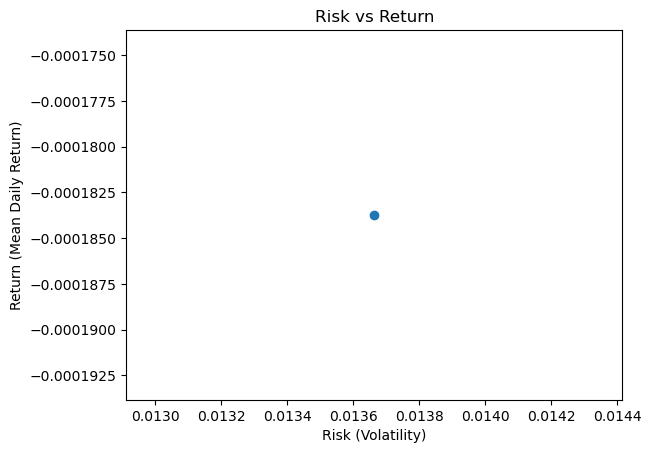

In [95]:
# Risk vs Return plot
risk = df['daily_returns'].std()
plt.figure()
plt.scatter(risk, daily_mean)
plt.title('Risk vs Return')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Return (Mean Daily Return)')
plt.show()